# Tutorial: Introducción al Topic Modeling con Gensim

In [3]:
import json, re
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

#### Cargamos los datos y creamos un Dataframe con los titulares y las noticias

In [4]:
with open('noticias.txt') as json_file:
    datos = json.load(json_file)
tuplas = list(zip([noticia.get("titular") for noticia in datos],[noticia.get("texto") for noticia in datos]))
df = pd.DataFrame(tuplas, columns =['Titular', 'Noticia'])
print(df.shape)
df.head()

(5665, 2)


,Titular,Noticia
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."


#### Preprocesamiento y limpieza de los textos

Creamos un método que se encarge de realizar una limpieza inicial de los texto mediante la eliminación de los caracteres especiales, de las palabras con un solo caracter, convirtiendo a minúsculas los textos, etc.

In [5]:
def limpiar_texto(texto):
    """
    Función para realizar una limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

Aplicamos la función a cada noticia

In [6]:
df["Tokens"] = df.Noticia.apply(limpiar_texto)
print(df.Tokens[0])
df.head()

el virus sars cov 2 entró en españa por la ciudad de vitoria en torno al 11 de febrero esa conclusión ha llegado el estudio elaborado por el instituto de investigación sanitaria de santiago de compostela idis que se acaba de publicar en la revista zoogical research los doctores al frente de la investigación aportan otro dato fundamental para entender el avance de la pandemia en nuestro país desde marzo hasta la actualidad se han identificado un total de cinco cepas genéticas del coronavirus las que se responsabiliza del 90 de los contagios producidos en nuestro país los doctores encargados del estudio antonio salas ellacuriaga federico martinón torres han analizado un total de 41 365 genomas de los que 1245 componen la muestra española a2a5 el segundo linaje más importante del virus en españa llegó desde italia en donde surgió su predecesor a2a es esta cepa del virus la que se hizo rápidamente fuerte en madrid según explican los investigadores luego pudo ser exportada otros lugares del

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov 2 entró en españa por la ciu...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos 15 robots recorren las calles de medellín...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...


Realizo la tokenización para dividir los textos en palabras individuales. 

In [7]:
tokenizer = ToktokTokenizer() 
df["Tokens"] = df.Tokens.apply(tokenizer.tokenize)
print(df.Tokens[0])
df.head()

['el', 'virus', 'sars', 'cov', '2', 'entró', 'en', 'españa', 'por', 'la', 'ciudad', 'de', 'vitoria', 'en', 'torno', 'al', '11', 'de', 'febrero', 'esa', 'conclusión', 'ha', 'llegado', 'el', 'estudio', 'elaborado', 'por', 'el', 'instituto', 'de', 'investigación', 'sanitaria', 'de', 'santiago', 'de', 'compostela', 'idis', 'que', 'se', 'acaba', 'de', 'publicar', 'en', 'la', 'revista', 'zoogical', 'research', 'los', 'doctores', 'al', 'frente', 'de', 'la', 'investigación', 'aportan', 'otro', 'dato', 'fundamental', 'para', 'entender', 'el', 'avance', 'de', 'la', 'pandemia', 'en', 'nuestro', 'país', 'desde', 'marzo', 'hasta', 'la', 'actualidad', 'se', 'han', 'identificado', 'un', 'total', 'de', 'cinco', 'cepas', 'genéticas', 'del', 'coronavirus', 'las', 'que', 'se', 'responsabiliza', 'del', '90', 'de', 'los', 'contagios', 'producidos', 'en', 'nuestro', 'país', 'los', 'doctores', 'encargados', 'del', 'estudio', 'antonio', 'salas', 'ellacuriaga', 'federico', 'martinón', 'torres', 'han', 'analiza

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[el, virus, sars, cov, 2, entró, en, españa, p..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[qué, es, montai, qué, relación, guarda, con, ..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[unos, 15, robots, recorren, las, calles, de, ..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[en, una, entrevista, en, radio, euskadi, reco..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, ha, dejado, de, ser, católica, decía,..."


Filtro las stopwords y los dígitos.

In [8]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS and not token.isdigit()]

df["Tokens"] = df.Tokens.apply(filtrar_stopword_digitos)

df.head()

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[virus, sars, cov, entró, españa, ciudad, vito..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[montai, relación, guarda, empresas, quién, de..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[robots, recorren, calles, medellín, realizar,..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[entrevista, radio, euskadi, recogida, europa,..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, dejado, ser, católica, decía, manuel,..."


Finalmente, reducimos cada palabra a su raíz mediante el proceso de stemming. 

In [9]:
stemmer = SnowballStemmer("spanish")

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

df["Tokens"] = df.Tokens.apply(stem_palabras)

df.head()

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[virus, sars, cov, entro, españ, ciud, vitori,..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[montai, relacion, guard, empres, quien, detra..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[robots, recorr, call, medellin, realiz, entre..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[entrev, radi, euskadi, recog, europ, press, g..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españ, dej, ser, catol, dec, manuel, azañ, co..."


## Parte II: Asignación de tópicos

#### Importamos las librerías necesarias

In [10]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

#### Creamos el diccionario necesario para el modelo LDA
Para ello le pasamos las listas con los tokens.

In [11]:
diccionario = Dictionary(df.Tokens)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 47388


Con filter_extremes mantenemos únicamentos los tokens que están mantenidos en al menos no_below documentos y los que están contenidos en no mas de no_above documentos. En este último caso le indicamos una fracción del tamaño del corpus.

In [12]:
diccionario.filter_extremes(no_below=2, no_above = 0.8)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 25522


Transformamos cada articulo en una representación vectorial (bolsa de palabras o BOW) con su frecuencia de aparición, para que nos sirva como entrada para el modelo LDA.

In [18]:
# Creamos el corpus 
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokens]

# Mostramos el BOW de una noticia representado 
# como una lista de tuplas (ID, frecuencia)
print(corpus[6])

[(3, 1), (25, 1), (26, 6), (29, 1), (40, 1), (41, 3), (44, 1), (48, 7), (52, 2), (67, 1), (68, 1), (77, 1), (86, 1), (94, 1), (96, 1), (108, 4), (116, 1), (118, 1), (121, 1), (131, 2), (146, 2), (149, 2), (164, 1), (172, 1), (176, 2), (178, 1), (193, 1), (204, 1), (210, 1), (222, 1), (235, 3), (236, 4), (238, 1), (245, 1), (268, 1), (276, 1), (283, 1), (295, 1), (299, 1), (311, 3), (312, 2), (339, 1), (349, 1), (367, 11), (372, 1), (394, 12), (407, 1), (413, 1), (431, 1), (436, 2), (439, 1), (440, 1), (450, 1), (454, 2), (462, 2), (475, 3), (478, 2), (492, 1), (498, 1), (502, 2), (513, 2), (525, 1), (531, 3), (549, 1), (561, 1), (574, 1), (587, 2), (615, 1), (631, 1), (640, 1), (650, 3), (653, 2), (656, 1), (660, 1), (677, 1), (680, 1), (683, 1), (684, 1), (686, 2), (694, 1), (732, 1), (784, 2), (793, 2), (794, 1), (804, 2), (817, 3), (830, 1), (839, 1), (840, 1), (842, 1), (852, 1), (866, 2), (913, 1), (915, 1), (917, 2), (921, 2), (933, 1), (958, 1), (1055, 1), (1057, 1), (1060, 1), 

#### Construimos el modelo LDA

In [15]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=50, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

In [16]:
topicos = lda.print_topics(num_words=5, num_topics=20)
for topico in topicos:
    print(topico)

(32, '0.065*"azul" + 0.055*"eolic" + 0.041*"sueñ" + 0.039*"arroy" + 0.037*"luz"')
(10, '0.103*"dolar" + 0.084*"uu" + 0.084*"ee" + 0.025*"jon" + 0.023*"street"')
(38, '0.173*"encuest" + 0.047*"votant" + 0.042*"dat" + 0.041*"ciudadan" + 0.040*"cis"')
(20, '0.081*"israel" + 0.042*"palestin" + 0.019*"netanyahu" + 0.018*"trump" + 0.014*"territori"')
(29, '0.133*"dependent" + 0.042*"punic" + 0.038*"dependient" + 0.038*"ramirez" + 0.029*"list"')
(34, '0.121*"cantabri" + 0.087*"santand" + 0.048*"cantabr" + 0.040*"miguel" + 0.031*"mar"')
(24, '0.028*"efect" + 0.024*"estudi" + 0.015*"tratamient" + 0.014*"pued" + 0.013*"salud"')
(9, '0.039*"miguel" + 0.023*"cas" + 0.015*"conden" + 0.013*"pnv" + 0.012*"corrupcion"')
(37, '0.305*"castill" + 0.184*"leon" + 0.085*"junt" + 0.064*"valladol" + 0.038*"provinci"')
(4, '0.035*"cas" + 0.031*"univers" + 0.027*"mast" + 0.020*"cifuent" + 0.015*"curs"')
(26, '0.032*"millon" + 0.024*"eur" + 0.019*"econom" + 0.014*"año" + 0.009*"banc"')
(35, '0.009*"proyect" + 0.

Visualizamos los tópicos como nubes de palabras

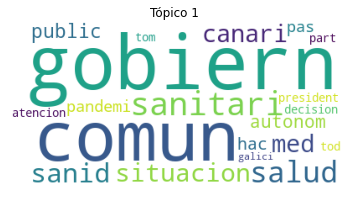

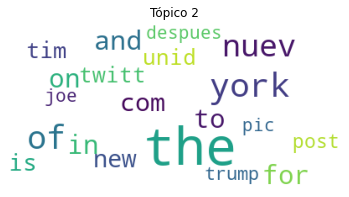

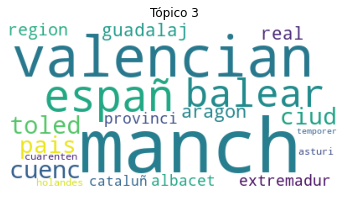

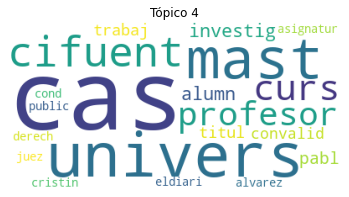

In [19]:
for i in range(1, 5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

#### Evaluación del modelo con un artículo de ejemplo ya visto
Para ello, escogemos una noticia aleatoriamente para evaluar si los tópicos escogidos por el modelo le representan.

In [62]:
indice_noticia = random.randint(0,len(df))
noticia = df.iloc[indice_noticia]
print("Titular: " + noticia.Titular)
print(noticia.Noticia)

Titular: Los intérpretes y traductores reivindican su papel: “España no se ha adaptado a la realidad multicultural de la sociedad”
Su aspiración profesional es contribuir a mejorar la visibilidad y el (re)conocimiento de la Traducción e Interpretación en los Servicios Públicos.                   Carmen Cedillo Corrochano es profesora en el Máster Universitario en Comunicación Intercultural, Interpretación y Traducción en los Servicios Públicos en la Universidad de Alcalá. Ha sido galardonada recientemente por la CIUTI, la Asociación Internacional de Universidades de Traducción e Interpretación más prestigiosa y antigua del mundo, por su tesis doctoral ‘La presencia mediática de la Traducción e Interpretación en los Servicios Públicos a través del análisis de discursos en la Red’.                  “Para ser un buen intérprete en los servicios públicos tienes que tener una sensibilidad mayor hacia lo diferente y lo vulnerable. Trabajamos en situaciones difíciles”, sostiene. “Normalmente 

In [96]:
indice_noticia

2716

Obtenemos el BOW del artículo y usamos el modelo para obtener la distribución de los tópicos.

In [21]:
bow_noticia = corpus[indice_noticia]
distribucion_noticia = lda[bow_noticia]
bow_noticia[0:10]

[(26, 4),
 (29, 2),
 (42, 1),
 (44, 1),
 (52, 2),
 (60, 1),
 (108, 1),
 (157, 1),
 (172, 1),
 (176, 1)]

Sacamos los índices y la contribución (proporción) de los tópicos más significativos para nuestro artículo.

In [158]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_noticia]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_noticia]]

Mostramos en un gráfico los tópicos más importantes.

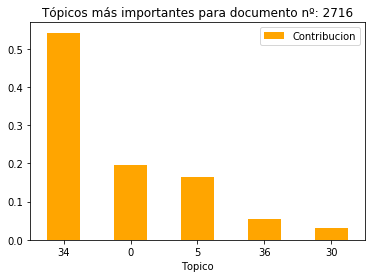

In [159]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="orange",
                                   title = "Tópicos más importantes para documento nº: " + str(indice_noticia))

Mostramos estos tópicos y sus palabras más significativas.

In [160]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 34 ***
cantabri, santand, cantabr, miguel, mar, angel, salmeron, menendez, torrelaveg, ceip 

*** Tópico: 0 ***
cas, resident, posit, person, dat, fallec, ultim, centr, nuev, cov 

*** Tópico: 5 ***
educ, centr, alumn, niñ, curs, colegi, profesor, clas, aul, famili 

*** Tópico: 36 ***
guerr, vasc, avion, ejercit, segund, dos, histori, part, mundial, navarr 

*** Tópico: 30 ***
vot, eleccion, electoral, part, alcald, ayunt, candidat, pod, municipal, concejal 



#### Evaluación del modelo con un artículo nuevo

In [57]:
texto_articulo = open("noticia1.txt")
articulo_nuevo = texto_articulo.read().replace("\n", " ")
texto_articulo.close()

Realizamos el preprocesamiento al texto, al igual que hicimos con el conjunto de artículos.

In [58]:
articulo_nuevo = limpiar_texto(articulo_nuevo)
articulo_nuevo = tokenizer.tokenize(articulo_nuevo)
articulo_nuevo = filtrar_stopword_digitos(articulo_nuevo)
articulo_nuevo = stem_palabras(articulo_nuevo)
articulo_nuevo

['cantabri',
 'viv',
 'año',
 'negr',
 'refier',
 'violenci',
 'gener',
 'doc',
 'mes',
 'comun',
 'acumul',
 'total',
 'denunci',
 'mujer',
 'victim',
 'violenci',
 'machist',
 'año',
 'sald',
 'dos',
 'asesin',
 'man',
 'parej',
 'unas',
 'cifr',
 'sobrecog',
 'marc',
 'hoj',
 'rut',
 'segun',
 'reconoc',
 'viern',
 'portavoz',
 'gobiern',
 'autonom',
 'pabl',
 'zuloag',
 'present',
 'memori',
 'anual',
 'mal',
 'dat',
 'par',
 'ahi',
 'inform',
 'recog',
 'numer',
 'denunci',
 'present',
 'cantabri',
 'año',
 'pas',
 'supon',
 'cifr',
 'alta',
 'registr',
 'ahor',
 'dict',
 'total',
 'orden',
 'alej',
 'acus',
 'conden',
 'firm',
 'tribunal',
 'registr',
 'avergüenz',
 'socied',
 'expres',
 'vicepresident',
 'cantabri',
 'present',
 'segun',
 'memori',
 'centr',
 'inform',
 'atencion',
 'integral',
 'gobiern',
 'cantabri',
 'asesor',
 'mujer',
 'acud',
 'primer',
 'vez',
 'are',
 'mal',
 'trat',
 'mujer',
 'asist',
 'menor',
 'total',
 'person',
 'ingres',
 'centr',
 'emergent',
 'c

Lo siguiente será pasar el artículo a BOW, obtener los indices y contribucion de los tópicos más importantes y mostrarlos en un gráfico de barras.

In [59]:
bow_articulo_nuevo = diccionario.doc2bow(articulo_nuevo)

In [31]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_articulo_nuevo]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_articulo_nuevo]]

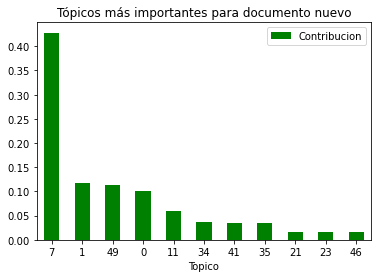

In [32]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="green",
                                   title = "Tópicos más importantes para documento nuevo")

In [33]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 7 ***
mujer, sexual, violenci, gener, hombr, person, muj, femin, victim, iguald 

*** Tópico: 1 ***
gobiern, comun, sanitari, salud, sanid, situacion, med, canari, public, autonom 

*** Tópico: 49 ***
tribunal, fiscal, judicial, justici, derech, delit, suprem, cas, ley, sentenci 

*** Tópico: 0 ***
cas, resident, posit, person, dat, fallec, ultim, nuev, centr, cov 

*** Tópico: 11 ***
años, pas, cas, hac, dos, sal, lleg, dia, trabaj, llev 

*** Tópico: 34 ***
cantabri, santand, cantabr, miguel, mar, angel, salmeron, menendez, torrelaveg, ceip 

*** Tópico: 41 ***
franc, victim, español, españ, memori, civil, muert, polit, derech, iglesi 

*** Tópico: 35 ***
proyect, agu, desarroll, cambi, medi, climat, form, nuev, zon, ciud 

*** Tópico: 21 ***
person, migrant, lleg, inmigr, acog, refugi, fronter, españ, pais, rescat 

*** Tópico: 23 ***
navarr, cataluny, barcelon, catalan, generalitat, torr, govern, foral, independent, cataluñ 

*** Tópico: 46 ***
histori, libr, pelicul, c

Guardamos el modelo y el diccionario para usarlos posteriormente con el comando load.

In [242]:
lda.save("articulos.model")
diccionario.save("articulos.dictionary")